Program 1

In [1]:
from functools import reduce 
import re  
def map_func(wc):     
    with open(file_name, 'r') as file:  
       lines = file.readlines()  
       words = [word.strip() for line in lines for word in line.split()]         
    return words  
def reduce_func(words):  
    word_count = {}  
    for word in words:         
      if word in word_count:             
         word_count[word] += 1         
      else:  
        word_count[word] = 1  
    return word_count  
def word_count(wc):  
    words = map_func(file_name)     
    word_count = reduce_func(words)     
    return word_count  
file_name = 'wc.txt'  
word_count_result = word_count(file_name)   
print("Word count:") 
for word, count in word_count_result.items():  
   print(f"{word}: {count}")


Word count:
My: 1
name: 1
is: 1
Sai: 1
Vamsi.: 1
Iam: 1
studing: 1
in: 1
AITS.: 1


Program 2

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


c:\Users\saiva\AppData\Local\Programs\Python\Python313\python.exe: No module named pip


In [3]:
import pandas as pd


df = pd.read_csv("students.csv")

print("Full Table:")
print(df)

print("\nStudents with marks > 70:")
print(df[df["marks"] > 70])

Full Table:
   id       name  age  marks branch  result
0   1       Raju   20     65    CSE       0
1   2  Lakshitha   21     92    CSE       1
2   3       Amit   22     78    ECE       1
3   4      Sneha   21     55    EEE       0
4   5      Rohit   23     85    CSE       1

Students with marks > 70:
   id       name  age  marks branch  result
1   2  Lakshitha   21     92    CSE       1
2   3       Amit   22     78    ECE       1
4   5      Rohit   23     85    CSE       1


Program 3

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("test").getOrCreate()
print("Spark running successfully!")


Spark running successfully!


In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg, max as mx, min as mn

def create_spark_session():
    spark = SparkSession.builder.appName("BigDataCleaning").getOrCreate()
    return spark

def load_data(spark):
    df = spark.read.csv("data.csv", header=True, inferSchema=True)
    return df

def explore_data(df):
    df.show()
    df.printSchema()
    df.describe().show()

def clean_data(df):
    df = df.withColumn("marks", when(col("marks").isNull(), 0).otherwise(col("marks")))
    avg_age = df.select(avg("age")).first()[0]
    df = df.withColumn("age", when(col("age").isNull(), avg_age).otherwise(col("age")))
    df.show()
    return df

def transform_data(df):
    df = df.withColumn("marks", col("marks") + 5)
    df = df.withColumn(
        "grade",
        when(col("marks") >= 90, "A")
        .when(col("marks") >= 75, "B")
        .otherwise("C")
    )
    df.show()
    return df
def analyze_data(df):
    df.select(
        mx("marks").alias("MaxMarks"),
        mn("marks").alias("MinMarks"),
        avg("marks").alias("AvgMarks")
    ).show()
def main():
    spark = create_spark_session()
    df = load_data(spark)
    explore_data(df)
    df = clean_data(df)
    df = transform_data(df)
    analyze_data(df)
    spark.stop()
if __name__ == "__main__":
    main()


+----+----+-----+
|name| age|marks|
+----+----+-----+
|   A|  20|   80|
|   B|NULL|   90|
|   C|  22| NULL|
|   D|  21|   70|
+----+----+-----+

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- marks: integer (nullable = true)

+-------+----+----+-----+
|summary|name| age|marks|
+-------+----+----+-----+
|  count|   4|   3|    3|
|   mean|NULL|21.0| 80.0|
| stddev|NULL| 1.0| 10.0|
|    min|   A|  20|   70|
|    max|   D|  22|   90|
+-------+----+----+-----+

+----+----+-----+
|name| age|marks|
+----+----+-----+
|   A|20.0|   80|
|   B|21.0|   90|
|   C|22.0|    0|
|   D|21.0|   70|
+----+----+-----+

+----+----+-----+-----+
|name| age|marks|grade|
+----+----+-----+-----+
|   A|20.0|   85|    B|
|   B|21.0|   95|    A|
|   C|22.0|    5|    C|
|   D|21.0|   75|    B|
+----+----+-----+-----+

+--------+--------+--------+
|MaxMarks|MinMarks|AvgMarks|
+--------+--------+--------+
|      95|       5|    65.0|
+--------+--------+--------+



Program 4

In [6]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator

def create_spark():
    spark = SparkSession.builder.appName("BigMLProject").getOrCreate()
    return spark

def load_data(spark):
    df = spark.read.csv("students.csv", header=True, inferSchema=True)
    return df

def explore_data(df):
    df.show()
    df.describe().show()

def prepare_features(df):
    assembler = VectorAssembler(inputCols=["marks"], outputCol="features")
    df = assembler.transform(df)
    df = df.select("features", "result")
    df.show()
    return df

def train_model(df):
    lr = LogisticRegression(labelCol="result", featuresCol="features")
    model = lr.fit(df)
    return model

def evaluate_model(model, df):
    predictions = model.transform(df)
    predictions.select("features", "result", "prediction", "probability").show()
    evaluator = BinaryClassificationEvaluator(labelCol="result")
    accuracy = evaluator.evaluate(predictions)
    print("Model Accuracy:", accuracy)

def main():
    spark = create_spark()
    df = load_data(spark)
    explore_data(df)
    df = prepare_features(df)
    model = train_model(df)
    evaluate_model(model, df)
    spark.stop()

if __name__ == "__main__":
    main()


+---+---------+---+-----+------+------+
| id|     name|age|marks|branch|result|
+---+---------+---+-----+------+------+
|  1|     Raju| 20|   65|   CSE|     0|
|  2|Lakshitha| 21|   92|   CSE|     1|
|  3|     Amit| 22|   78|   ECE|     1|
|  4|    Sneha| 21|   55|   EEE|     0|
|  5|    Rohit| 23|   85|   CSE|     1|
+---+---------+---+-----+------+------+

+-------+------------------+-----+-----------------+------------------+------+------------------+
|summary|                id| name|              age|             marks|branch|            result|
+-------+------------------+-----+-----------------+------------------+------+------------------+
|  count|                 5|    5|                5|                 5|     5|                 5|
|   mean|               3.0| NULL|             21.4|              75.0|  NULL|               0.6|
| stddev|1.5811388300841898| NULL|1.140175425099138|14.983324063771695|  NULL|0.5477225575051661|
|    min|                 1| Amit|               20

Program 5

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, avg, max as mx, min as mn
def create_spark_session():
    spark = SparkSession.builder.appName("NoSQL_JSON_Processing").getOrCreate()
    return spark
def load_data(spark):
    df = spark.read.option("multiLine", True).json("students.json")
    df = df.withColumn("student", explode(col("students")))
    df = df.select(
        col("student.id").alias("id"),
        col("student.name").alias("name"),
        col("student.branch").alias("branch"),
        col("student.marks").alias("marks")
    )
    return df
def explore_data(df):
    df.show()
    df.printSchema()
    df.describe().show()
def analyze_data(df):
    stats = df.select(
        mx(col("marks")).alias("MaxMarks"),
        mn(col("marks")).alias("MinMarks"),
        avg(col("marks")).alias("AvgMarks")
    )
    stats.show()
    branch_avg = df.groupBy("branch").avg("marks")
    branch_avg.show()
    top_student = df.orderBy(col("marks").desc()).limit(1)
    top_student.show()
    return df, branch_avg
def main():
    spark = create_spark_session()
    df = load_data(spark)
    explore_data(df)
    df, branch_avg = analyze_data(df)
    spark.stop()
if __name__ == "__main__":
    main()

+---+-----+------+-----+
| id| name|branch|marks|
+---+-----+------+-----+
|  1|lucky|   CSE|   80|
|  2|amith|   CSE|   90|
|  3| raju|   ECE|   70|
+---+-----+------+-----+

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- branch: string (nullable = true)
 |-- marks: long (nullable = true)

+-------+---+-----+------+-----+
|summary| id| name|branch|marks|
+-------+---+-----+------+-----+
|  count|  3|    3|     3|    3|
|   mean|2.0| NULL|  NULL| 80.0|
| stddev|1.0| NULL|  NULL| 10.0|
|    min|  1|amith|   CSE|   70|
|    max|  3| raju|   ECE|   90|
+-------+---+-----+------+-----+

+--------+--------+--------+
|MaxMarks|MinMarks|AvgMarks|
+--------+--------+--------+
|      90|      70|    80.0|
+--------+--------+--------+

+------+----------+
|branch|avg(marks)|
+------+----------+
|   ECE|      70.0|
|   CSE|      85.0|
+------+----------+

+---+-----+------+-----+
| id| name|branch|marks|
+---+-----+------+-----+
|  2|amith|   CSE|   90|
+---+-----+-

Program 6

  month  sales country  year
0   Jan    100   India  2023
1   Feb    120     USA  2023
2   Mar    150   India  2023
3   Apr    180     USA  2024
4   May    200   India  2024
            sales         year
count    5.000000     5.000000
mean   150.000000  2023.400000
std     41.231056     0.547723
min    100.000000  2023.000000
25%    120.000000  2023.000000
50%    150.000000  2023.000000
75%    180.000000  2024.000000
max    200.000000  2024.000000
Max: 200
Min: 100
Avg: 150.0


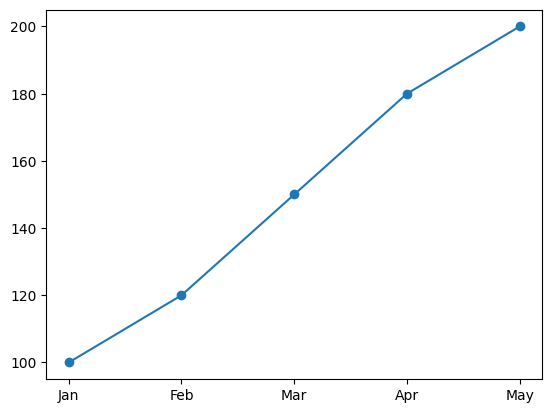

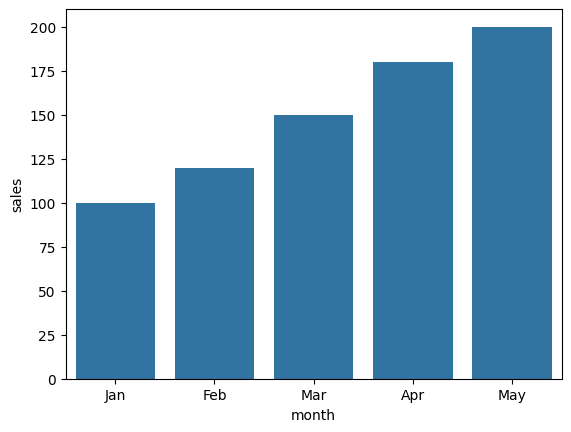

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    df = pd.read_csv("sales.csv")
    print(df)
    return df

def analyze_data(df):
    print(df.describe())
    print("Max:", df["sales"].max())
    print("Min:", df["sales"].min())
    print("Avg:", df["sales"].mean())

def line_plot(df):
    plt.figure()
    plt.plot(df["month"], df["sales"], marker="o")
    plt.show()

def bar_plot(df):
    plt.figure()
    sns.barplot(x="month", y="sales", data=df)
    plt.show()

def main():
    df = load_data()
    analyze_data(df)
    line_plot(df)
    bar_plot(df)

if __name__ == "__main__":
    main()


Program 7

In [11]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
def load_data():
    print("Reading sales data from file...")
    df = pd.read_csv("sales.csv")
    print(df)
    return df
def analyze_data(df):
    print("Basic statistics:")
    print(df.describe())
    print("Finding max and min sales:")
    print("Max Sales:", df["sales"].max())
    print("Min Sales:", df["sales"].min())
def create_plot(df):
    fig = px.line(df, x="month", y="sales", markers=True, title="Monthly Sales Analysis")
    return fig
def create_app(fig):
    app = dash.Dash(__name__)

    app.layout = html.Div([
        html.H1("Sales Dashboard", style={"textAlign": "center"}),
        html.P("This dashboard shows monthly sales analysis."),
        dcc.Graph(figure=fig)
    ])
    return app
def main():
    df = load_data()
    analyze_data(df)
    fig = create_plot(df)
    app = create_app(fig)
    app.run(debug=True)
if __name__ == "__main__":
    main()

Reading sales data from file...
  month  sales country  year
0   Jan    100   India  2023
1   Feb    120     USA  2023
2   Mar    150   India  2023
3   Apr    180     USA  2024
4   May    200   India  2024
Basic statistics:
            sales         year
count    5.000000     5.000000
mean   150.000000  2023.400000
std     41.231056     0.547723
min    100.000000  2023.000000
25%    120.000000  2023.000000
50%    150.000000  2023.000000
75%    180.000000  2024.000000
max    200.000000  2024.000000
Finding max and min sales:
Max Sales: 200
Min Sales: 100


Program 8

In [12]:
import pandas as pd

def load_data():
    print("Loading student dataset...")
    df = pd.read_csv("students.csv")
    print(df)
    return df

def basic_info(df):
    print("\n=== First 5 Rows ===")
    print(df.head())

    print("\n=== Last 5 Rows ===")
    print(df.tail())

    print("\n=== Dataset Info ===")
    print(df.info())

def statistical_analysis(df):
    print("\n=== Statistical Summary ===")
    print(df.describe())

    print("\nMax Marks:", df["marks"].max())
    print("Min Marks:", df["marks"].min())
    print("Average Marks:", df["marks"].mean())

def null_analysis(df):
    print("\n=== Missing Values ===")
    print(df.isnull().sum())

def group_analysis(df):
    print("\n=== Age-wise Average Marks ===")
    print(df.groupby("age")["marks"].mean())

def main():
    df = load_data()
    basic_info(df)
    statistical_analysis(df)
    null_analysis(df)
    group_analysis(df)
    print("\nEDA Completed Successfully.")

if __name__ == "__main__":
    main()


Loading student dataset...
   id       name  age  marks branch  result
0   1       Raju   20     65    CSE       0
1   2  Lakshitha   21     92    CSE       1
2   3       Amit   22     78    ECE       1
3   4      Sneha   21     55    EEE       0
4   5      Rohit   23     85    CSE       1

=== First 5 Rows ===
   id       name  age  marks branch  result
0   1       Raju   20     65    CSE       0
1   2  Lakshitha   21     92    CSE       1
2   3       Amit   22     78    ECE       1
3   4      Sneha   21     55    EEE       0
4   5      Rohit   23     85    CSE       1

=== Last 5 Rows ===
   id       name  age  marks branch  result
0   1       Raju   20     65    CSE       0
1   2  Lakshitha   21     92    CSE       1
2   3       Amit   22     78    ECE       1
3   4      Sneha   21     55    EEE       0
4   5      Rohit   23     85    CSE       1

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non

Program 9

In [2]:
pip show pyspark


Name: pyspark
Version: 4.1.1
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: Apache-2.0
Location: c:\users\saiva\anaconda3\envs\spark_env\lib\site-packages
Requires: py4j
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, max as mx, min as mn

def create_spark():
    import os
    os.environ["HADOOP_HOME"] = "C:\\Hadoop"

    spark = SparkSession.builder \
        .appName("RealTimeStreaming") \
        .master("local[*]") \
        .config("spark.hadoop.fs.file.impl", "org.apache.hadoop.fs.RawLocalFileSystem") \
        .config("spark.hadoop.fs.AbstractFileSystem.file.impl", "org.apache.hadoop.fs.local.LocalFs") \
        .getOrCreate()

    return spark


def read_stream(spark):
    print("Starting to read streaming data from folder...")
    folder_path = r"C:\Users\saiva\LAB\LAB-\lab 3-2\BDA\stream_data"     
    df = spark.readStream.text(folder_path)
    df = df.withColumn("value", col("value").cast("int"))
    return df
def process_stream(df):
    print("Processing streaming data...")

    stats_df = df.groupBy().agg(
        avg("value").alias("Average"),
        mx("value").alias("Maximum"),
        mn("value").alias("Minimum")
    )

    return stats_df

def write_output(df):
    query = df.writeStream \
        .outputMode("complete") \
        .format("console") \
        .start()

    query.awaitTermination()

def main():
    spark = create_spark()
    df = read_stream(spark)
    stats_df = process_stream(df)
    write_output(stats_df)

if __name__ == "__main__":
    main()


program 10

In [13]:
import pandas as pd
def load_data():
    print("Loading sales data...")
    df = pd.read_csv("sales.csv")
    print(df)
    return df
def clean_data(df):
    print("Checking for missing values...")
    print(df.isnull().sum())
    df = df.dropna()
    return df
def analyze_data(df):
    print("Country-wise total sales:")
    country_summary = df.groupby("country")["sales"].sum()
    print(country_summary)
    print("Year-wise total sales:")
    year_summary = df.groupby("year")["sales"].sum()
    print(year_summary)
    return country_summary, year_summary
def save_for_dashboard(country_summary, year_summary):
    country_summary.to_csv("country_dashboard.csv")
    year_summary.to_csv("year_dashboard.csv")
    print("Dashboard files generated successfully.")
def main():
    df = load_data()
    df = clean_data(df)
    country_summary, year_summary = analyze_data(df)
    save_for_dashboard(country_summary, year_summary)
if __name__ == "__main__":
    main()

Loading sales data...
  month  sales country  year
0   Jan    100   India  2023
1   Feb    120     USA  2023
2   Mar    150   India  2023
3   Apr    180     USA  2024
4   May    200   India  2024
Checking for missing values...
month      0
sales      0
country    0
year       0
dtype: int64
Country-wise total sales:
country
India    450
USA      300
Name: sales, dtype: int64
Year-wise total sales:
year
2023    370
2024    380
Name: sales, dtype: int64
Dashboard files generated successfully.


Program 11

Loading student data...
   id       name  age  marks branch  result
0   1       Raju   20     65    CSE       0
1   2  Lakshitha   21     92    CSE       1
2   3       Amit   22     78    ECE       1
3   4      Sneha   21     55    EEE       0
4   5      Rohit   23     85    CSE       1
Checking missing values...
id        0
name      0
age       0
marks     0
branch    0
result    0
dtype: int64
Overall statistics:
             id        age      marks    result
count  5.000000   5.000000   5.000000  5.000000
mean   3.000000  21.400000  75.000000  0.600000
std    1.581139   1.140175  14.983324  0.547723
min    1.000000  20.000000  55.000000  0.000000
25%    2.000000  21.000000  65.000000  0.000000
50%    3.000000  21.000000  78.000000  1.000000
75%    4.000000  22.000000  85.000000  1.000000
max    5.000000  23.000000  92.000000  1.000000
Branch-wise average marks:
branch
CSE    80.666667
ECE    78.000000
EEE    55.000000
Name: marks, dtype: float64
Top scorer:
id                2
nam

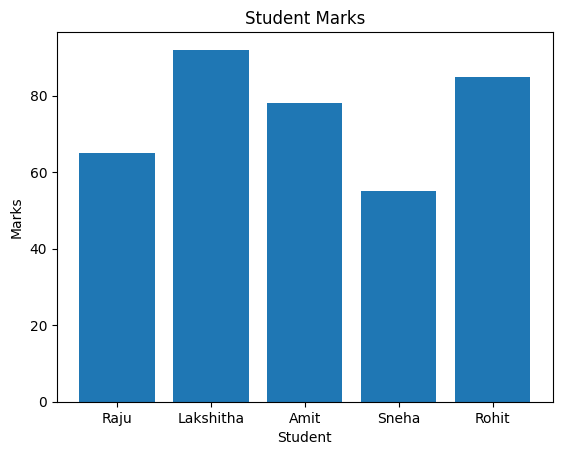

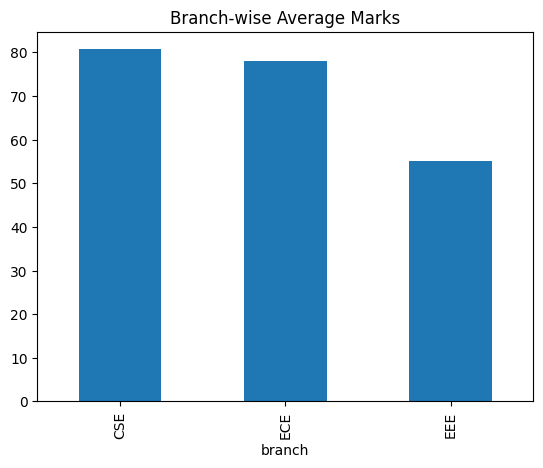

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    print("Loading student data...")
    df = pd.read_csv("students.csv")
    print(df)
    return df
def clean_data(df):
    print("Checking missing values...")
    print(df.isnull().sum())
    df = df.dropna()
    return df
def analyze_data(df):
    print("Overall statistics:")
    print(df.describe())
    print("Branch-wise average marks:")
    branch_avg = df.groupby("branch")["marks"].mean()
    print(branch_avg)
    print("Top scorer:")
    top_student = df.loc[df["marks"].idxmax()]
    print(top_student)
    return branch_avg
def save_processed(df, branch_avg):
    df.to_csv("processed_students.csv", index=False)
    branch_avg.to_csv("branch_avg.csv")
    print("Processed files saved.")
def visualize(df, branch_avg):
    plt.figure()
    plt.bar(df["name"], df["marks"])
    plt.title("Student Marks")
    plt.xlabel("Student")
    plt.ylabel("Marks")
    plt.show()
    plt.figure()
    branch_avg.plot(kind="bar")
    plt.title("Branch-wise Average Marks")
    plt.show()
def main():
    df = load_data()
    df = clean_data(df)
    branch_avg = analyze_data(df)
    save_processed(df, branch_avg)
    visualize(df, branch_avg)
if __name__ == "__main__":
    main()


program 12
